<a href="https://colab.research.google.com/github/hwanys2/AI-math/blob/main/5.%ED%9A%8C%EA%B7%80%EC%99%80%EB%B6%84%EB%A5%98/5_2.k_means_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 빅데이터 분석
[KAGGLE](https://www.kaggle.com) 데이터

내용출처
[수학과 함께하는 AI기초](http://www.yes24.com/Product/Goods/92450319)

In [1]:
import pandas as pd

In [ ]:
data_url= 'https://raw.githubusercontent.com/hwanys2/data/main/players_21.csv'
fifa2021 = pd.read_csv(data_url)
fifa2021

In [ ]:
# 우리나라 선수만 모아보기
korea = fifa2021[fifa2021['nationality'] == "Korea Republic"]
korea



---



---



# 과제
## 나이가 35살 보다 많은 선수들만 모아보세요
upper_age_35 = 로 시작하세요



---



---



In [ ]:
# 우리나라 선수이름과 Value 보기
korea_name_value = korea.loc[:,['long_name','value_eur']]       # [행 , 열] 지정  : 
korea_name_value

,long_name,value_eur
46,손흥민 孙兴慜,52500000
943,황희찬 黄喜灿,12000000
1414,김신욱 金信煜,6000000
1711,조현우 崔永宇,6000000
2062,이강인 Kang-In Lee,9000000
...,...,...
18849,Han Min Jeong,60000
18866,Ki Yeol Kim,50000
18869,Oh Yeon Cha,50000
18876,Ji Yong Jeong,45000


In [ ]:
#### 우리나라 돈으로 환산하기
korea_name_value['몸값(천원)'] = korea_name_value['value_eur'] * 1.342
korea_name_value



---



---



# 자료 슬라이싱
## 2000번째까지 선수들 중에서 한국선수의 long_name, value_eur 의 데이터를 만드세요.
korea_name_value_top 로 데이터의 이름을 정하겠습니다.

In [ ]:
korea_name_value_top = korea.loc[:2000,['long_name','value_eur']] 
korea_name_value_top



---



---





---



---



# 한국 선수 분석

한국선수의 'short_name','shooting','passing','dribbling','defending' 만을 모아서 시각적으로 표현해보겠습니다. <br>
dropna()는 빈칸을 제거하는 명령입니다.

In [4]:
korea_features = korea.loc[:,['short_name','shooting','passing','dribbling','defending']].dropna()
korea_features

,short_name,shooting,passing,dribbling,defending
46,H. Son,86.0,80.0,87.0,43.0
943,Hwang Hee Chan,75.0,71.0,79.0,28.0
1414,Kim Shin Wook,76.0,62.0,67.0,41.0
2062,Kangin Lee,72.0,75.0,79.0,27.0
2233,Kwon Chang Hoon,70.0,73.0,78.0,51.0
...,...,...,...,...,...
18849,Jeong Han Min,49.0,40.0,47.0,27.0
18866,Kim Ki Yeol,39.0,48.0,55.0,43.0
18869,Cha Oh Yeon,36.0,49.0,46.0,53.0
18876,Jeong Ji Yong,49.0,38.0,54.0,23.0


## 슈팅과 패스 능력의 관계를 살펴보기 위해 산점도로 나타냅니다.

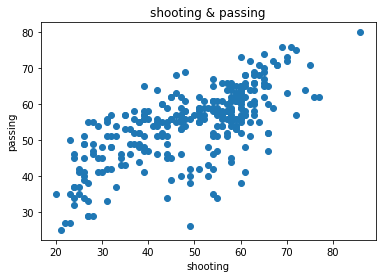

In [6]:
import matplotlib.pyplot as plt
plt.title("shooting & passing")      # 그래프의 제목 입력 
plt.xlabel('shooting')                 # x축 이름 입력 
plt.ylabel('passing')               # y축 이름 입력 
plt.scatter(korea_features['shooting'],korea_features['passing'])     # 산점도 그리기

## 아래에 shooting 와 defending의 관계를 그래프로 나타내보세요



---





---



---



# 군집화
## 슈팅과 패싱 점수를 바탕으로 비슷한 그룹끼리 그룹지어 보도록 하겠습니다.

먼저 슈팅, 패싱 정보만 group_korea 에 담겠습니다.

In [9]:
group_korea = korea.loc[:,['shooting','passing']].dropna()
group_korea

,shooting,passing
46,86.0,80.0
943,75.0,71.0
1414,76.0,62.0
2062,72.0,75.0
2233,70.0,73.0
...,...,...
18849,49.0,40.0
18866,39.0,48.0
18869,36.0,49.0
18876,49.0,38.0


# K-means 군집화 방법을 사용하겠습니다.

비계층적 군집화 방법으로 전체 데이터를 상대적으로 유사한 K개의 군집으로 구분하는 방법입니다.

![이미지](https://www.notion.so/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F09e0386f-0205-47ad-ac8d-0a90f55690d7%2FUnknown.png?table=block&id=ae88daf5-72dd-4adb-a76e-8cdeb51e9499&spaceId=0f859e6e-7f7d-4665-851d-3e7244ab307b&width=2000&userId=dfd283da-c918-4fc5-8a30-95ceb1b2371a&cache=v2)

K-means 군집화의 과정은 클러스터의 개수를 결정하게 되면 데이터 공간에 K개의 클러스터가 형성되며 각 클러스터의 중심은 해당 클러스터에 포함된 데이터의 평균으로 조정하게 됩니다. 클러스터의 중심이 변하지 않을 때까지 클러스터 중심을 조정하며 군집을 생성합니다.
<br>
<aside>
💡 1. 클러스터 개수 K값 결정하기 <br>
2. 데이터 공간에 클러스터 중심 K개 할당하기<br>
3. 각 클러스터 중심을 해당 클러스터 데이터의 평균으로 재조정하기<br>
4. 클러스터 중심이 변하지 않을 때까지 3.을 반복 시행
<br>
</aside>

K-means 군집화는 빠르고 간단하게 군집화가 가능하다는 강점이 있고 적절하지 못한 K를 설정할 경우 그 결과가 좋지 못할 수 있다는 약점이 있다.

In [10]:
import numpy as np
X = np.array(group_korea)    # 자료를 벡터로 변환

In [11]:
k = 3                                # 군집화 하려는 개수 즉 3그룹으로 나누려고 함.
C_x = np.random.choice(X[:, 0],k)    # 슈팅 점수중 k개 추출
C_y = np.random.choice(X[:, 1],k)    # 패싱 점수중 k개 추출
C = np.array(list(zip(C_x, C_y)))
print(C)

[[57. 58.]
 [51. 62.]
 [63. 64.]]


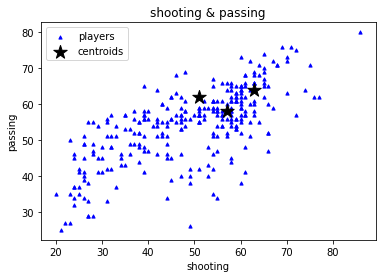

In [12]:
# 그래프로 그리기. 중심은 별로 표시
plt.title("shooting & passing")    # 타이틀
plt.xlabel('shooting')
plt.ylabel('passing')
plt.scatter(group_korea['shooting'],group_korea['passing'], marker = '^', c = 'blue', s = 10, label = 'players')
plt.scatter(C_x, C_y, marker ='*', s=200, c= 'black', label='centroids')
plt.legend(loc = 'best')    # 범례를 좋은위치에

## 각 표본에 가까운 중심에 할당하기

In [13]:
# 유클리디안 거리 계산 함수 만들기
def Distance(A, B):
    return np.sqrt(np.sum(np.power((A-B),2)))

In [14]:
C_old = np.zeros(C.shape)       # C 와 같은 모양의 0행렬
clusters = np.zeros(len(X))     # 데이터의 개수 만큼 0
flag = Distance(C, C_old)       # 새로운 중심과 이전 중심의 거리를 구함. 
flag

145.3375381654719

## 각 군집의 중심을 새롭게 계산하기

In [15]:
from copy import deepcopy

distances = []

while flag != 0:                         # 새로 구해진 중심과 직전의 중심과 같아질 떄까지 반복하라

    for i in range(len(X)):              # 한국선수의 수만큼 반복, 모든 선수를 중심과 가장 가까운 곳을 찾는 시도
        for j in range(k):               # 각 선수마다 k개의 중심점 중 거리를 구해서 가장 가까운 곳을 찾는 시도
            temp = Distance(X[i], C[j])  # 선수와 k개의 중심점과 거리를 temp에 저장
            distances.append(temp)       # [10, 20, 41] 이런식으로 각 중심과의 거리가 담기게 됨. 이때 가장 작은 것이 필요.
    
        cluster = np.argmin(distances)   # 거리가 가장 작은 것의 인덱스를 cluster로 지정. 즉 위의 [10, 20, 41]이라면 0번째를 cluster에 저장. np.argmin이 최소값의 인덱스출력
        clusters[i] = cluster            # 모든 선수들이 어떤 중심점에 가까운지 분류됨.
        distances = []                   # 다음 선수의 거리를 측정하기 전에 distance 초기화
  
    C_old = deepcopy(C)                  # 딥카피는 후속 작업에 영향을 안받아서 사용해야함. 

    for i in range(k):                   # 새로운 중심점을 분류된 집합의 평균 x,y 좌표로 지정함.
        points = [X[j] for j in range(len(X)) if clusters[j]==i]
        C[i] = np.mean(points, axis=0)
  

    flag = Distance(C, C_old)            # 위 과정을 반복하면서 새로운 중심점과 이전의 중심점의 거리를 구함. 이게 0이 될때까지 지속함.
print(C)

[[49.30327869 54.02459016]
 [30.63636364 43.66233766]
 [62.45       63.16      ]]


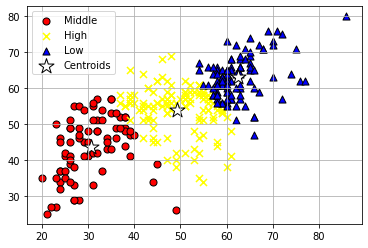

In [ ]:
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], s=50, c='red', marker ='o', edgecolor = 'black', label = 'Middle')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], s=50, c='yellow', marker ='x', edgecolor = 'black', label = 'High')
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], s=50, c='blue', marker ='^', edgecolor = 'black', label = 'Low')

plt.scatter(C[:,0], C[:,1], s = 250, marker = '*', c = 'white', edgecolor='black',label='Centroids')
plt.legend()
plt.grid()

# 과제

위 코드를 수정하여 4개의 그룹으로 나누어보세요^^



---



---



---



---



In [16]:
import pandas as pd 
from sklearn.cluster import KMeans # model 

In [17]:
model = KMeans(n_clusters=6, random_state=0, algorithm='auto') 
dataDF = group_korea[['shooting', 'passing']]
model.fit(dataDF) 

KMeans(n_clusters=6, random_state=0)

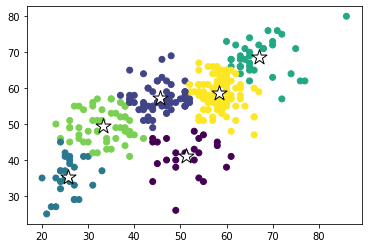

In [18]:
pred = model.predict(dataDF) 
centers = model.cluster_centers_ 
plt.scatter(x=dataDF['shooting'], y=dataDF['passing'], c=pred) 
plt.scatter(x=centers[:,0], y=centers[:,1], marker='*', s=250, c = 'white', edgecolor='black',)

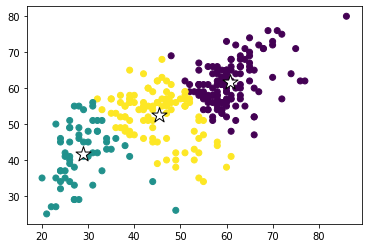

In [ ]:
# pandas와 sklearn이 필요하다. 다음과 같이 불러온다.
import pandas as pd 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

# 원본데이터를 불러온다.
data_url= 'https://raw.githubusercontent.com/hwanys2/data/main/players_21.csv'
fifa2021 = pd.read_csv(data_url)

# 필요한 데이터만 불러온다
korea = fifa2021[fifa2021['nationality'] == "Korea Republic"]
group_korea = korea.loc[:,['shooting','passing']].dropna()

# 사이킷런에 모델에 적용시킨다.
model = KMeans(n_clusters=3, random_state=0, algorithm='auto')    # n_clusters 값이 군집의 갯수이다.
model.fit(group_korea)

# 그래프 표현
pred = model.predict(group_korea) 
centers = model.cluster_centers_ 
plt.scatter(x=group_korea['shooting'], y=group_korea['passing'], c=pred) 
plt.scatter(x=centers[:,0], y=centers[:,1], marker='*', s=250, c = 'white', edgecolor='black',)